In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SampleName = "SC_3TP_QC_K562_EL4"

In [3]:
timetagdf = pd.read_table(SampleName+".aligned.sorted.merged.tagged.time_tags.csv", sep = "\t")
human_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.HUMAN_ONLY.dge.txt.gz")
human_vector=human_df.iloc[:,1:].sum()
mouse_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.MOUSE_ONLY.dge.txt.gz")
mouse_vector=mouse_df.iloc[:,1:].sum()

In [4]:
type(human_vector)

pandas.core.series.Series

In [5]:
human_transcript_df = pd.DataFrame({'CELL BARCODES':human_vector.index, 'HUMAN_COUNTS':human_vector.values})
display(human_transcript_df)
mouse_transcript_df = pd.DataFrame({'CELL BARCODES':mouse_vector.index, 'MOUSE_COUNTS':mouse_vector.values})
display(mouse_transcript_df)
combined_transcript_df = human_transcript_df.merge(mouse_transcript_df, on='CELL BARCODES')
display(combined_transcript_df)

,CELL BARCODES,HUMAN_COUNTS
0,CTGTCTCTTATA,20
1,CCCACAGTATCA,15844
2,TCACATCGCTAT,432
3,GATTGCAGACGT,316
4,CCACAAAGGCCC,222
...,...,...
495,GTTTCCTAACGG,171
496,AAGATGTCGTTC,200
497,ATTCATCCAGTT,675
498,CTTCCAGGACCT,413


,CELL BARCODES,MOUSE_COUNTS
0,CTGTCTCTTATA,23
1,CCCACAGTATCA,432
2,TCACATCGCTAT,12175
3,GATTGCAGACGT,6817
4,CCACAAAGGCCC,7577
...,...,...
495,GTTTCCTAACGG,171
496,AAGATGTCGTTC,119
497,ATTCATCCAGTT,142
498,CTTCCAGGACCT,24


,CELL BARCODES,HUMAN_COUNTS,MOUSE_COUNTS
0,CTGTCTCTTATA,20,23
1,CCCACAGTATCA,15844,432
2,TCACATCGCTAT,432,12175
3,GATTGCAGACGT,316,6817
4,CCACAAAGGCCC,222,7577
...,...,...,...
495,GTTTCCTAACGG,171,171
496,AAGATGTCGTTC,200,119
497,ATTCATCCAGTT,675,142
498,CTTCCAGGACCT,413,24


In [6]:
timetagdf

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG
0,TTCGATTGCGCG,22529,SEQ10_GGTT,1,1,1,0,0,1,0,2,3,22080,16,424
1,ATGAGCTTCAAA,138,SEQ11_GGCC,0,0,0,0,0,0,0,0,0,0,138,0
2,GACGATTAGGCC,100,SEQ10_GGTT,0,0,0,0,0,0,0,0,0,99,1,0
3,GGTGAGAGTCCG,11957,SEQ11_GGCC,0,1,47,14,0,0,0,0,1,2,11883,9
4,GTCAACTCCCCG,3053,SEQ11_GGCC,0,0,14,0,0,0,0,0,0,1,3034,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,CACAGGCGACCA,24,SEQ10_GGTT,0,0,0,0,0,0,0,0,0,24,0,0
34660,AGCAACGCTTAT,53,SEQ12_GGGG,0,0,0,0,0,0,0,0,0,0,0,53
34661,CACACGTTTCCT,127,SEQ10_GGTT,0,0,0,0,0,0,0,0,0,127,0,0
34662,AGCTGATTCAGC,23,SEQ12_GGGG,0,0,0,0,0,0,0,0,0,0,0,23


In [7]:
timetagdf=timetagdf[~timetagdf["FINAL TIME TAG"].str.contains("Collision Detected")] #Removing Cell Barcodes with Collision in Time-Tag Determination

In [8]:
Combined_df_for_plot = timetagdf.merge(combined_transcript_df, on = "CELL BARCODES")
#Combined_df_for_plot["BARCODES BELONGS"] = Combined_df_for_plot[['HUMAN_COUNTS', 
 #                                 'MOUSE_COUNTS']].idxmax(axis=1)
Combined_df_for_plot

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG,HUMAN_COUNTS,MOUSE_COUNTS
0,TTCGATTGCGCG,22529,SEQ10_GGTT,1,1,1,0,0,1,0,2,3,22080,16,424,2525,117
1,GGTGAGAGTCCG,11957,SEQ11_GGCC,0,1,47,14,0,0,0,0,1,2,11883,9,1443,53
2,GGAGCTGGACCG,15134,SEQ11_GGCC,0,1,103,9,0,0,3,0,1,9,14985,23,2041,120
3,CGACTCGGAGAA,14589,SEQ10_GGTT,0,0,0,0,0,1,0,0,1,14146,14,427,1996,68
4,ATCTCCTATACT,13865,SEQ11_GGCC,0,2,34,9,2,0,0,0,1,2,13809,6,1780,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,TATTCAGCGCGG,4040,SEQ12_GGGG,1,0,3,0,0,0,0,0,0,4,5,4027,23,559
436,TAACCGCCACTT,5844,SEQ12_GGGG,0,0,16,0,0,0,0,0,0,2,0,5826,35,922
437,CCGTATAAGGGG,4681,SEQ12_GGGG,1,0,3,0,0,0,0,0,0,7,0,4670,25,1398
438,ATGCCGTCCCCT,4494,SEQ12_GGGG,0,0,4,0,0,0,0,0,0,3,1,4486,20,347


In [9]:
Combined_df_for_plot["FINAL TIME TAG"].value_counts()

SEQ12_GGGG    194
SEQ10_GGTT    161
SEQ11_GGCC     85
Name: FINAL TIME TAG, dtype: int64

In [19]:
Combined_df_for_plot[["CELL BARCODES","FINAL TIME TAG","HUMAN_COUNTS","MOUSE_COUNTS"]].to_csv("Species_Mixing_data.time_tags.csv",index=False)

(0.0, 12000.0)

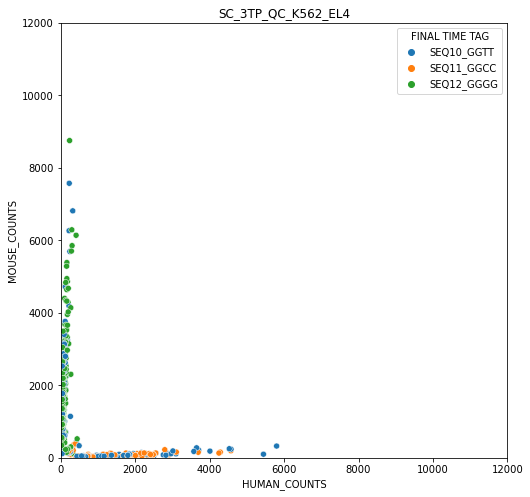

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=Combined_df_for_plot, 
                x="HUMAN_COUNTS", 
                y="MOUSE_COUNTS",
                hue = 'FINAL TIME TAG'
               ).set_title(SampleName)
ax.set_xlim(0, 12000)
ax.set_ylim(0, 12000)
#pdfs.savefig()

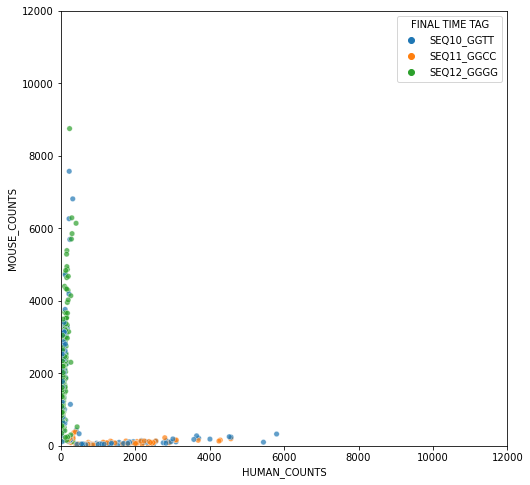

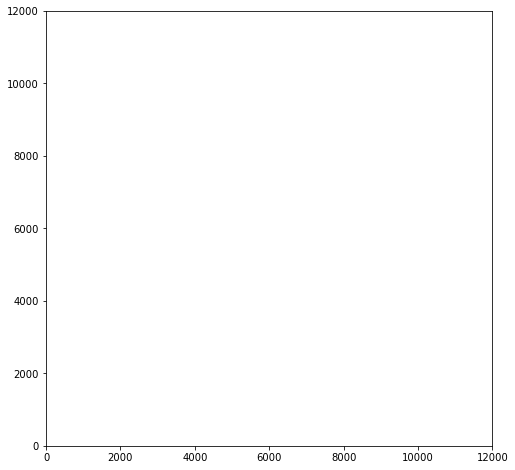

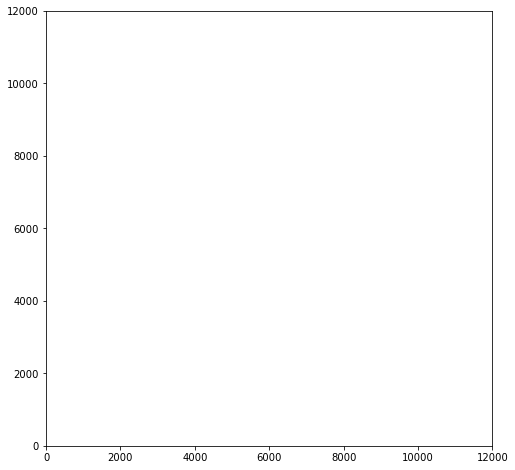

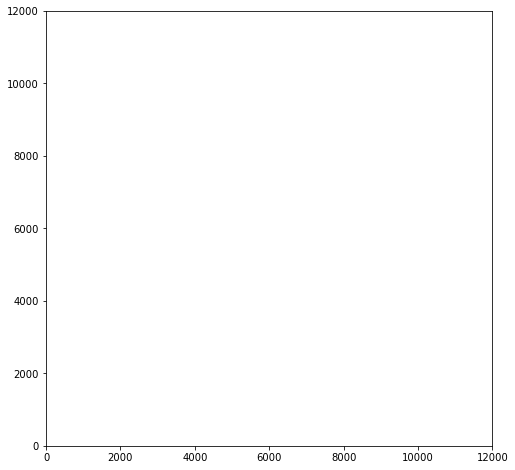

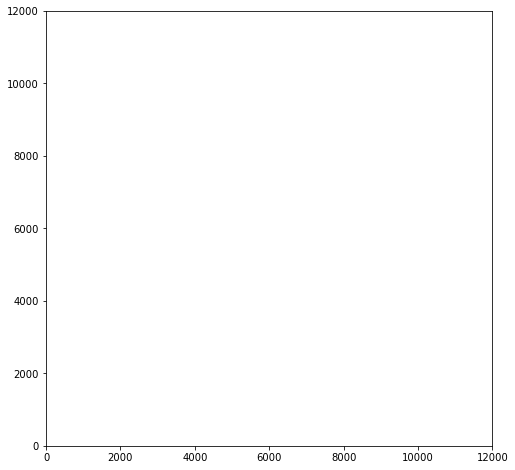

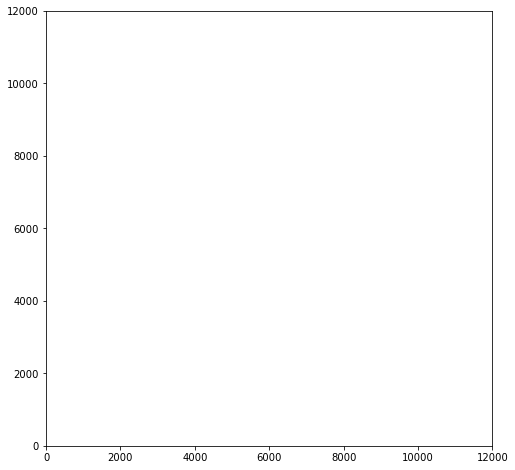

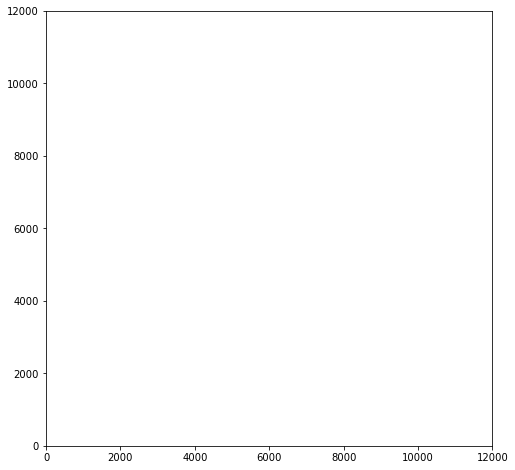

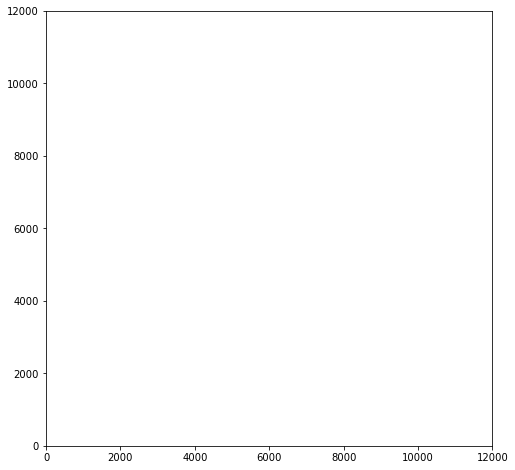

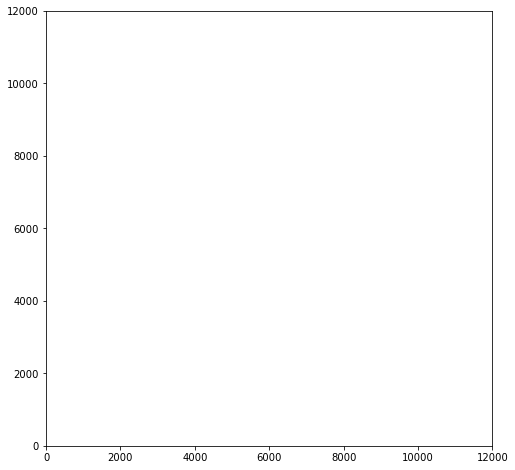

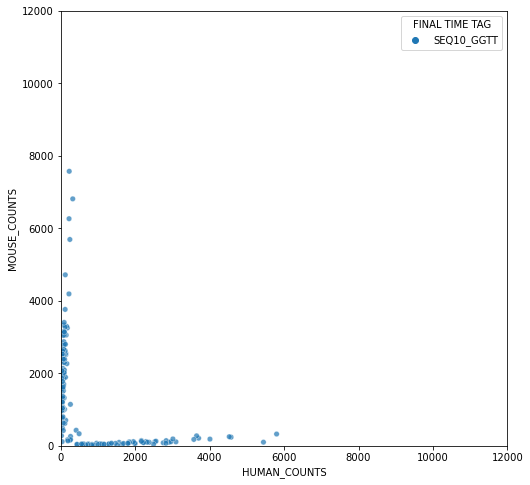

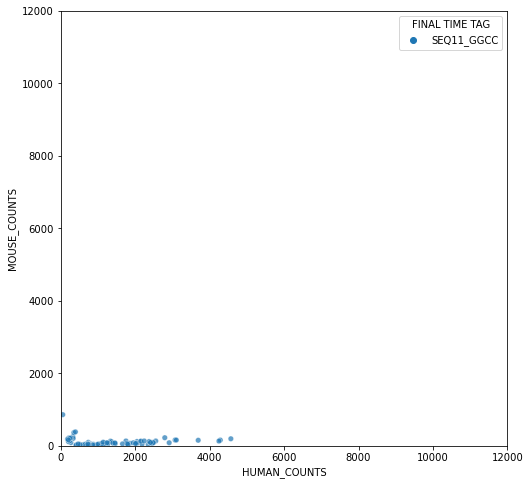

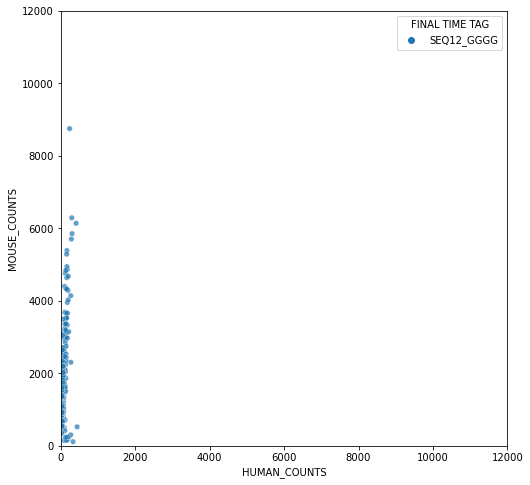

In [28]:
seqnamelist=["SEQ1","SEQ2","SEQ3","SEQ4","SEQ5","SEQ6","SEQ7","SEQ8","SEQ9","SEQ10","SEQ11","SEQ12"]
for seqname in seqnamelist:
    plotdata=Combined_df_for_plot[Combined_df_for_plot["FINAL TIME TAG"].str.contains(seqname)]
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(data=plotdata, 
                    x="HUMAN_COUNTS", 
                    y="MOUSE_COUNTS",
                    hue = 'FINAL TIME TAG',
                    #palette='viridis', # Or choose another color palette
                    s=30, # Adjust point size
                    alpha=0.7 # Adjust transparency

                   ).set_title("")
    ax.set_xlim(0, 12000)
    ax.set_ylim(0, 12000)
    plt.savefig(seqname+'.svg', format='svg')
    #pdfs.savefig()
#pdfs.close()